In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error,root_mean_squared_error,r2_score

In [4]:
df=pd.read_csv(r"C:\Users\NTCUONG\notebook\cnt-first-project\feature_selection\training1.csv")
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Ageofhouse,SalePrice
0,60,3,65.0,8450,1,3,3,0,4,0,...,0,0,0,0,2,2008,8,4,5,208500
1,20,3,80.0,9600,1,3,3,0,2,0,...,0,0,0,0,5,2007,8,4,31,181500
2,60,3,68.0,11250,1,0,3,0,4,0,...,0,0,0,0,9,2008,8,4,7,223500
3,70,3,60.0,9550,1,0,3,0,0,0,...,0,0,0,0,2,2006,8,0,91,140000
4,60,3,84.0,14260,1,0,3,0,2,0,...,0,0,0,0,12,2008,8,4,8,250000


In [5]:
corr=df.corr()

In [6]:
df.corr().sort_values("SalePrice",ascending=False).head(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Ageofhouse,SalePrice
SalePrice,-0.084284,-0.166872,0.334901,0.263843,0.041036,-0.255580,0.015453,-0.014314,-0.067396,0.051152,...,0.044584,0.111447,0.092404,-0.021190,0.046432,-0.028923,-0.054911,0.213092,-0.523350,1.000000
OverallQual,0.032628,-0.160099,0.234196,0.105806,0.058823,-0.190497,0.028907,-0.001881,-0.031086,-0.066450,...,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,-0.060472,0.193703,-0.572629,0.790982
GrLivArea,0.074853,-0.082615,0.368392,0.263116,0.044121,-0.175093,-0.068523,-0.008545,-0.089208,0.043860,...,0.020643,0.101510,0.170205,-0.002416,0.050240,-0.036526,-0.041480,0.080729,-0.200302,0.708624
GarageCars,-0.040110,-0.157042,0.269729,0.154871,-0.020025,-0.183906,0.045769,0.008161,-0.066967,-0.002683,...,0.035765,0.050494,0.020934,-0.043080,0.040522,-0.039117,-0.068295,0.184943,-0.538727,0.640409
GarageArea,-0.098672,-0.189250,0.323663,0.180403,-0.047794,-0.160639,0.047626,0.006372,-0.064023,0.004826,...,0.035087,0.051412,0.061047,-0.027400,0.027974,-0.027378,-0.090670,0.181284,-0.479408,0.623431
TotalBsmtSF,-0.238518,-0.087834,0.363358,0.260833,0.005068,-0.175782,0.005189,-0.014233,-0.040049,0.032498,...,0.037384,0.084489,0.126053,-0.018479,0.013196,-0.014969,-0.094983,0.110853,-0.391498,0.613581
1stFlrSF,-0.251758,-0.055614,0.414266,0.299475,0.005950,-0.172613,-0.042103,0.012287,-0.062414,0.068323,...,0.056104,0.088758,0.131525,-0.021096,0.031372,-0.013604,-0.118436,0.075893,-0.282143,0.605852
FullBath,0.131608,-0.198290,0.180424,0.126031,0.046471,-0.159390,0.050363,-0.026862,-0.007531,-0.046936,...,0.035353,-0.008106,0.049604,-0.014290,0.055872,-0.019669,-0.035458,0.143864,-0.468403,0.560664
TotRmsAbvGrd,0.040380,-0.043200,0.320146,0.190015,0.046828,-0.119250,-0.053458,0.007769,-0.049246,-0.033768,...,-0.006683,0.059383,0.083757,0.024763,0.036907,-0.034516,-0.041252,0.070660,-0.096955,0.533723
YearBuilt,0.027850,-0.308908,0.117598,0.014228,0.021137,-0.226062,0.161622,-0.011505,0.013629,-0.073639,...,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,-0.052425,0.201044,-0.999036,0.522897


In [7]:
def create_df(col_list):
    df_fs=df["SalePrice"]
    for col in col_list:
        df_fs=pd.concat([df[col],df_fs],axis=1)
    return df_fs

In [8]:
model=DecisionTreeRegressor()

In [9]:
def eval(df_fs):
    X_train,X_test,y_train,y_test=train_test_split(df_fs.iloc[:,:-1],df_fs.iloc[:,-1],test_size=0.2,random_state=42)
    model.fit(X_train,y_train)
    y_pre=model.predict(X_test)
    k.append(i)
    mae.append(mean_absolute_error(y_test,y_pre))
    rmse.append(root_mean_squared_error(y_test,y_pre))
    r2.append(r2_score(y_test,y_pre))

### FEATURE SELECTION DEPEND ON CORRELATION MATRIX

plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),cmap='coolwarm')

In [10]:
c=corr.sort_values("SalePrice",ascending=False).head(10).index
c

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt'],
      dtype='object')

In [11]:
k, mae, rmse, r2 = [], [], [], []
for i in range(10,120):
    c=corr.sort_values("SalePrice",ascending=False).iloc[1:i,:].index
    df_fs=create_df(c)
    eval(df_fs)
statistic_tup={
    "K":k,
    "MAE":mae,
    "RMSE":rmse,
    "r2":r2
}
statistic=pd.DataFrame(statistic_tup)
statistic

,K,MAE,RMSE,r2
0,10,24838.294521,38549.596534,0.806257
1,11,25319.329909,38269.233786,0.809065
2,12,25919.910959,39106.162247,0.800622
3,13,26214.291096,41046.528973,0.780346
4,14,26009.188356,39664.769974,0.794886
...,...,...,...,...
105,115,26012.938356,41176.512245,0.778953
106,116,26732.150685,40567.112046,0.785447
107,117,27865.856164,42205.546179,0.767766
108,118,26819.102740,41197.924399,0.778723


In [12]:
statistic.sort_values("MAE",ascending=True)

,K,MAE,RMSE,r2
27,37,24155.544521,37603.094953,0.815654
26,36,24511.037671,36628.781894,0.825083
23,33,24800.232877,36597.649775,0.825381
0,10,24838.294521,38549.596534,0.806257
31,41,25058.869863,37176.458050,0.819814
...,...,...,...,...
81,91,28775.246575,44384.039263,0.743174
69,79,28870.160959,44766.712425,0.738726
61,71,28958.078767,45877.944269,0.725594
85,95,29071.698630,46238.469504,0.721264


C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_5580\3627608168.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_5580\3627608168.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")


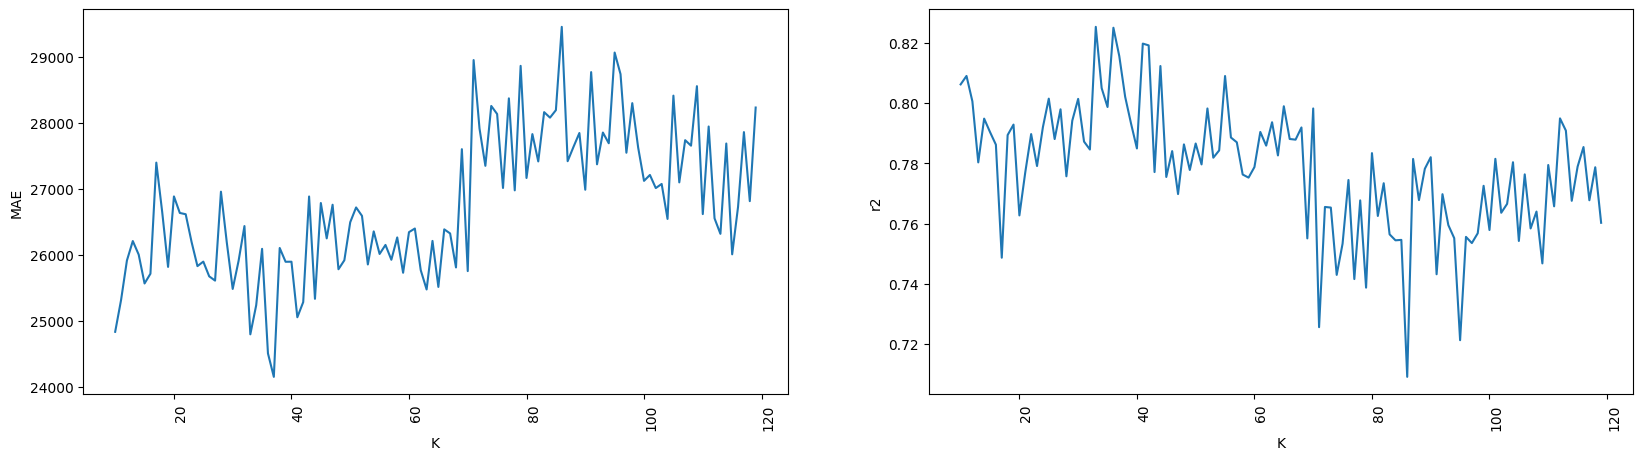

In [13]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
ax1=sns.lineplot(data=statistic,x="K",y="MAE",ax=axes[0])
ax2=sns.lineplot(data=statistic,x="K",y="r2",ax=axes[1])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")
plt.show()

### FEATURE SELECTION BY REMOVE FEATURE WITH LOW VARIENCE


### 1.CALCULATE VARIENCE FOR EACH FEATURE

In [14]:
varr=np.var(df)
varr

D:\miniconda\lib\site-packages\numpy\core\fromnumeric.py:3785: FutureWarning: The behavior of DataFrame.var with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return var(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


MSSubClass       1.788113e+03
MSZoning         3.991725e-01
LotFrontage      4.847253e+02
LotArea          9.955741e+07
Street           4.092700e-03
                     ...     
YrSold           1.762629e+00
SaleType         2.407365e+00
SaleCondition    1.211050e+00
Ageofhouse       9.144450e+02
SalePrice        6.306789e+09
Length: 75, dtype: float64

In [15]:
varr.loc[varr > 0.1].index

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'LotShape',
       'LandContour', 'LotConfig', 'Neighborhood', 'Condition1', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition', 'A

### 2.USING VarianceThreshold FROM SKLEARN

In [16]:
from sklearn.feature_selection import VarianceThreshold

In [17]:
varr_thresh=VarianceThreshold(threshold=0.1)
varr_thresh.fit_transform(df)
selected_columns = df.columns[varr_thresh.get_support()]
selected_columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'LotShape',
       'LandContour', 'LotConfig', 'Neighborhood', 'Condition1', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition', 'A

In [18]:
k, mae, rmse, r2 = [], [], [], []
for i in range(100,500):
    varr_thresh=VarianceThreshold(threshold=i/1000)
    varr_thresh.fit_transform(df.iloc[:,:-1])
    selected_columns = df.iloc[:,:-1].columns[varr_thresh.get_support()]
    df_fs=create_df(selected_columns)
    eval(df_fs)
statistic_tup={
    "K":k,
    "MAE":mae,
    "RMSE":rmse,
    "r2":r2
}
statistic=pd.DataFrame(statistic_tup)
statistic

,K,MAE,RMSE,r2
0,100,26869.900685,41465.141582,0.775843
1,101,27337.386986,42717.006522,0.762104
2,102,28041.037671,41075.617179,0.780035
3,103,27842.342466,42668.289498,0.762646
4,104,27795.568493,42973.808285,0.759235
...,...,...,...,...
395,495,27817.660959,43688.284677,0.751162
396,496,28404.592466,43518.157386,0.753097
397,497,27397.571918,41413.288899,0.776403
398,498,26452.934932,41482.982675,0.775650


In [19]:
statistic.sort_values("MAE",ascending=True)

,K,MAE,RMSE,r2
10,110,25151.825342,38735.493229,0.804384
137,237,25792.698630,40415.353265,0.787049
16,116,25816.849315,41368.108799,0.776891
385,485,25824.085616,37713.310491,0.814572
219,319,25886.232877,39979.115444,0.791622
...,...,...,...,...
128,228,29220.448630,45023.733069,0.735717
256,356,29353.102740,46073.918532,0.723244
312,412,29555.565068,45177.776146,0.733906
281,381,29604.736301,46407.672347,0.719220


C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_5580\873788412.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_5580\873788412.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")


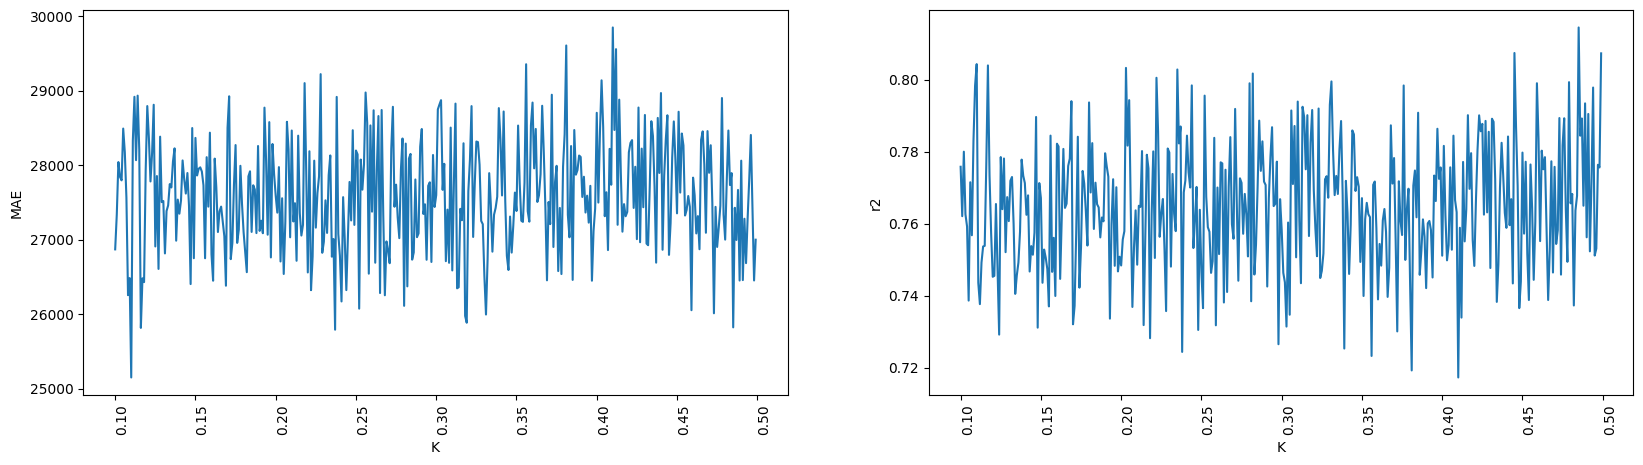

In [20]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
ax1=sns.lineplot(data=statistic,x=statistic["K"]/1000,y="MAE",ax=axes[0])
ax2=sns.lineplot(data=statistic,x=statistic["K"]/1000,y="r2",ax=axes[1])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")
plt.show()

### Univariate feature selection


### Statistic function (r_regression, f_regression, mutual_info_regression)

### 1. r_regression


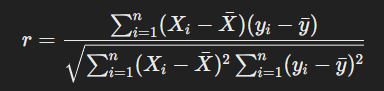

### Using numpy

In [21]:
def similitary_score(x,y):
    x_avg=np.average(x)
    y_avg=np.average(y)
    up=np.sum((x-x_avg)*(y-y_avg))
    down=np.sqrt(np.sum((x-x_avg)**2)*np.sum((y-y_avg)**2))
    return up/down

In [22]:
print(similitary_score(df["OverallQual"],df["SalePrice"]))

0.7909816005838051


In [23]:
top_feature=[]
for col in df.columns:
    score=similitary_score(df[col],df["SalePrice"])
    if col != "SalePrice" and score > 0.6:
        top_feature.append([col,score])
top_feature

[['OverallQual', 0.7909816005838051],
 ['TotalBsmtSF', 0.6135805515591953],
 ['1stFlrSF', 0.6058521846919146],
 ['GrLivArea', 0.708624477612652],
 ['GarageCars', 0.640409197258352],
 ['GarageArea', 0.6234314389183616]]

### Using sklearn

In [24]:
from sklearn.feature_selection import r_regression
from sklearn.feature_selection import SelectKBest
# for i in range(5,21):
fs=SelectKBest(r_regression,k=6)
fl_df=fs.fit_transform(df.iloc[:,:-1],df.iloc[:,-1])
# selected=df.columns[fs.get_support()]
fs.get_feature_names_out()

array(['OverallQual', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea',
       'GarageCars', 'GarageArea'], dtype=object)

In [25]:
k, mae, rmse, r2 = [], [], [], []

for i in range(5,120):
    fs=SelectKBest(r_regression,k=i)
    fl_df=fs.fit_transform(df.iloc[:,:-1],df.iloc[:,-1])
    c=fs.get_feature_names_out()
    df_fs=create_df(c)
    eval(df_fs)
statistic_tup={
    "K":k,
    "MAE":mae,
    "RMSE":rmse,
    "r2":r2
}
statistic=pd.DataFrame(statistic_tup)
statistic.to_csv("r_regression_label_enc.csv")
statistic


D:\miniconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=75 is greater than n_features=74. All the features will be returned.
  warnings.warn(
D:\miniconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=76 is greater than n_features=74. All the features will be returned.
  warnings.warn(
D:\miniconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=77 is greater than n_features=74. All the features will be returned.
  warnings.warn(
D:\miniconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=78 is greater than n_features=74. All the features will be returned.
  warnings.warn(
D:\miniconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=79 is greater than n_features=74. All the features will be returned.
  warnings.warn(
D:\miniconda\lib\site-packages\sklearn\feature_selection\_un

,K,MAE,RMSE,r2
0,5,26488.227169,39045.261618,0.801243
1,6,26531.438356,39556.410476,0.796005
2,7,26510.600457,38916.699674,0.802550
3,8,25626.057078,36792.983791,0.823512
4,9,24911.181507,38479.057462,0.806965
...,...,...,...,...
110,115,27493.712329,40988.786084,0.780964
111,116,26694.989726,39997.293746,0.791432
112,117,26067.787671,39487.054090,0.796720
113,118,27505.404110,43124.128651,0.757547


In [26]:
statistic.sort_values("MAE",ascending=True)

,K,MAE,RMSE,r2
5,10,24247.230594,36660.192163,0.824783
9,14,24493.702055,38492.749188,0.806828
28,33,24678.089041,36440.579845,0.826876
50,55,24869.359589,37685.087967,0.814849
63,68,24900.856164,39399.106318,0.797624
...,...,...,...,...
87,92,28499.434932,44797.828740,0.738362
114,119,28693.160959,45145.389757,0.734287
84,89,28792.123288,45663.977894,0.728147
83,88,28904.335616,44118.122887,0.746242


C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_5580\3627608168.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_5580\3627608168.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")


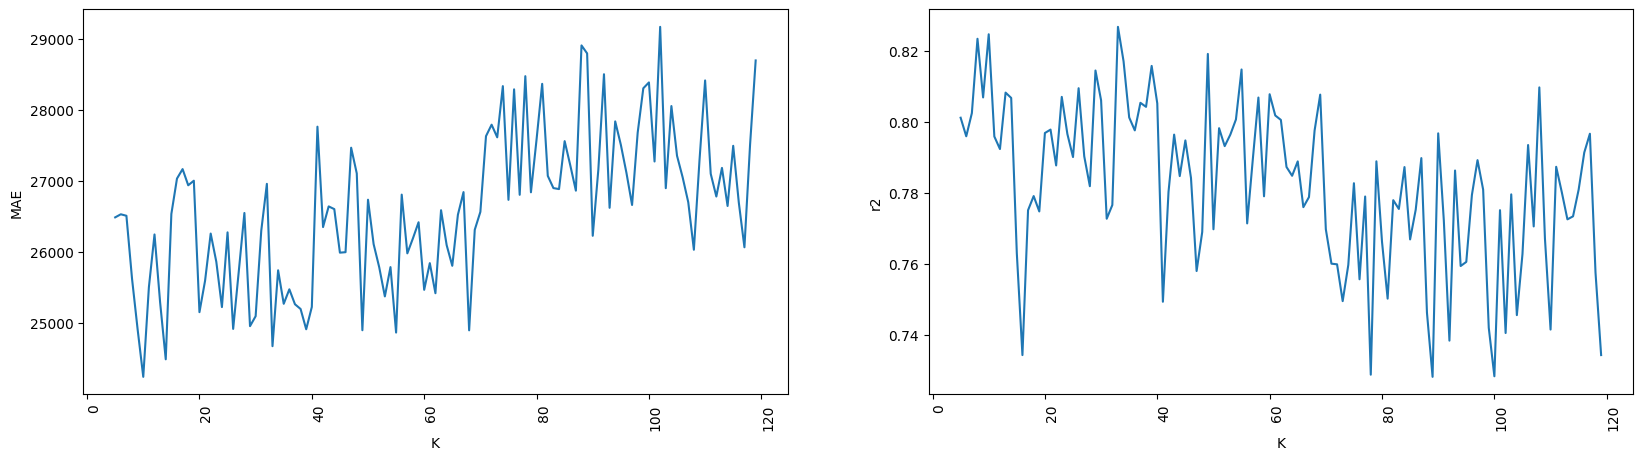

In [27]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
ax1=sns.lineplot(data=statistic,x="K",y="MAE",ax=axes[0])
ax2=sns.lineplot(data=statistic,x="K",y="r2",ax=axes[1])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")
plt.show()

### 2.f_regression

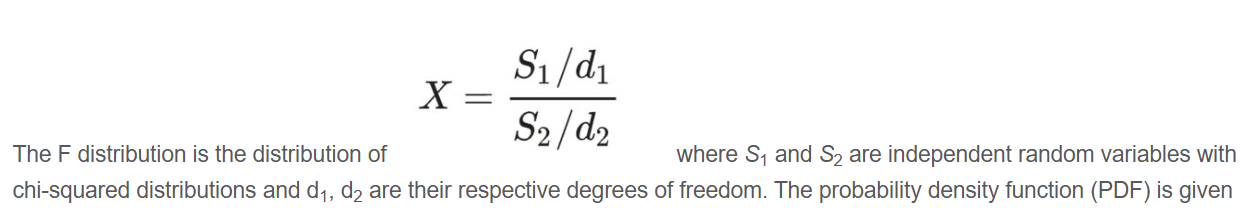

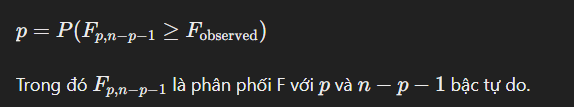

In [28]:
from sklearn.feature_selection import f_regression

In [29]:
k, mae, rmse, r2 = [], [], [], []
for i in range(5,120):
    fs=SelectKBest(f_regression,k=i)
    fl_df=fs.fit_transform(df.iloc[:,:-1],df.iloc[:,-1])
    c=fs.get_feature_names_out()
    df_fs=create_df(c)
    eval(df_fs)
statistic_tup={
    "K":k,
    "MAE":mae,
    "RMSE":rmse,
    "r2":r2
}
statistic=pd.DataFrame(statistic_tup)
statistic.to_csv("f_regression_label_enc.csv")
statistic

D:\miniconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=75 is greater than n_features=74. All the features will be returned.
  warnings.warn(
D:\miniconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=76 is greater than n_features=74. All the features will be returned.
  warnings.warn(
D:\miniconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=77 is greater than n_features=74. All the features will be returned.
  warnings.warn(
D:\miniconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=78 is greater than n_features=74. All the features will be returned.
  warnings.warn(
D:\miniconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=79 is greater than n_features=74. All the features will be returned.
  warnings.warn(
D:\miniconda\lib\site-packages\sklearn\feature_selection\_un

,K,MAE,RMSE,r2
0,5,27696.877854,42044.445071,0.769536
1,6,26468.381279,38530.449973,0.806449
2,7,24642.073059,36127.957832,0.829834
3,8,26774.980594,40796.321671,0.783016
4,9,26308.817922,39624.650608,0.795300
...,...,...,...,...
110,115,26310.910959,40098.024516,0.790380
111,116,27355.842466,41673.123464,0.773589
112,117,27298.400685,42118.967503,0.768718
113,118,27284.876712,40406.687440,0.787141


In [30]:
statistic.sort_values("MAE",ascending=True)

,K,MAE,RMSE,r2
12,17,23681.082192,35884.673275,0.832118
15,20,24605.337329,36446.514013,0.826820
2,7,24642.073059,36127.957832,0.829834
10,15,24666.719178,36540.828576,0.825922
6,11,25091.112443,38735.678305,0.804382
...,...,...,...,...
39,44,28959.780822,45698.875231,0.727732
68,73,29101.109589,45354.373456,0.731821
24,29,29331.356164,45130.149670,0.734466
25,30,29712.208904,45943.227656,0.724812


C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_5580\3627608168.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_5580\3627608168.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")


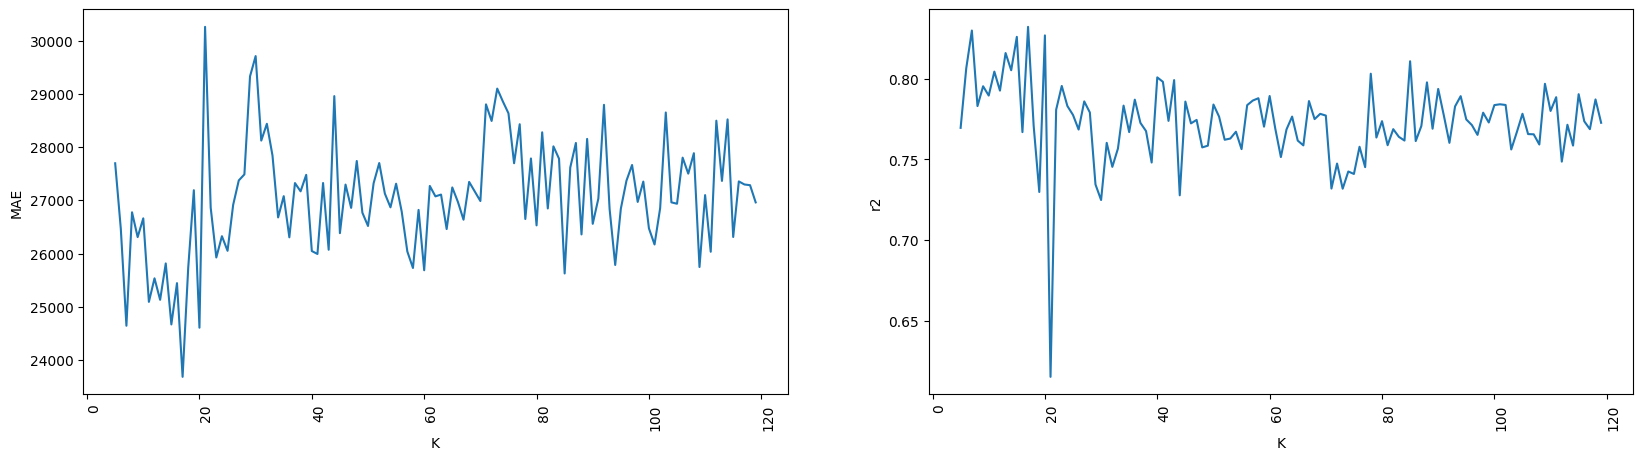

In [31]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
ax1=sns.lineplot(data=statistic,x="K",y="MAE",ax=axes[0])
ax2=sns.lineplot(data=statistic,x="K",y="r2",ax=axes[1])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")
plt.show()

### 3.Mutual infomation

### Fomula

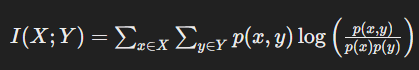

### Mesure dependency of 2 variable X,Y

### KDE method (Estimate Probability Density Function)

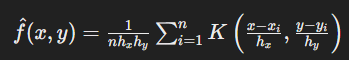

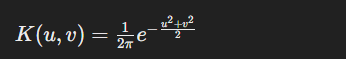

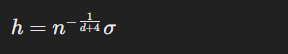

In [32]:
all_col=df.columns
all_col

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPor

In [33]:
from sklearn.feature_selection import mutual_info_regression

In [34]:
k, mae, rmse, r2 = [], [], [], []
for i in range(5,120):
    fs=SelectKBest(mutual_info_regression,k=i)
    fl_df=fs.fit_transform(df.iloc[:,:-1],df.iloc[:,-1])
    c=fs.get_feature_names_out()
    df_fs=create_df(c)
    eval(df_fs)
statistic_tup={
    "K":k,
    "MAE":mae,
    "RMSE":rmse,
    "r2":r2
}
statistic=pd.DataFrame(statistic_tup)
statistic

D:\miniconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=75 is greater than n_features=74. All the features will be returned.
  warnings.warn(
D:\miniconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=76 is greater than n_features=74. All the features will be returned.
  warnings.warn(
D:\miniconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=77 is greater than n_features=74. All the features will be returned.
  warnings.warn(
D:\miniconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=78 is greater than n_features=74. All the features will be returned.
  warnings.warn(
D:\miniconda\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=79 is greater than n_features=74. All the features will be returned.
  warnings.warn(
D:\miniconda\lib\site-packages\sklearn\feature_selection\_un

,K,MAE,RMSE,r2
0,5,25694.134132,39421.120980,0.797398
1,6,24165.355023,38651.963992,0.805227
2,7,25651.304795,41296.445956,0.777663
3,8,24759.392123,40475.145705,0.786419
4,9,26828.248288,44273.870867,0.744447
...,...,...,...,...
110,115,27593.270548,42452.567073,0.765040
111,116,27498.623288,44199.145458,0.745309
112,117,26578.493151,43459.102745,0.753766
113,118,26308.756849,38865.104466,0.803073


In [35]:
statistic.to_csv("mutual_infomation_label_enc.csv")

In [36]:
statistic.sort_values("MAE",ascending=True)

,K,MAE,RMSE,r2
13,18,23388.119863,35830.150055,0.832628
6,11,24157.246575,36331.968516,0.827907
1,6,24165.355023,38651.963992,0.805227
7,12,24281.279110,38228.561654,0.809471
10,15,24482.840753,38097.276985,0.810777
...,...,...,...,...
93,98,28626.976027,44990.611130,0.736106
77,82,28648.017123,43646.271504,0.751641
64,69,28710.976027,45080.645336,0.735048
105,110,28897.503425,43975.889417,0.747875


C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_5580\3627608168.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
C:\Users\NTCUONG\AppData\Local\Temp\ipykernel_5580\3627608168.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")


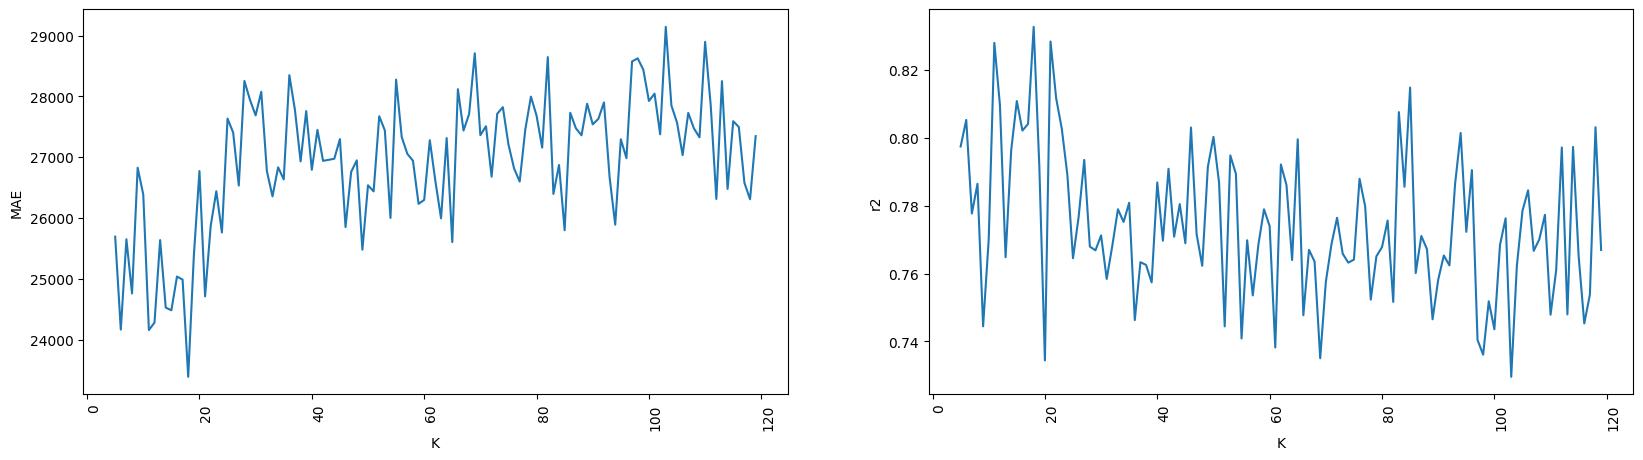

In [37]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
ax1=sns.lineplot(data=statistic,x="K",y="MAE",ax=axes[0])
ax2=sns.lineplot(data=statistic,x="K",y="r2",ax=axes[1])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")
plt.show()

### RFE (Recursive feature elimination)

df

from sklearn.feature_selection import RFE,RFECV
rfe=RFE(estimator=model,n_features_to_select=5)
rfe.fit(df.iloc[:,:-1],df.iloc[:,-1])
rfe.get_feature_names_out()

k, mae, rmse, r2 = [], [], [], []
for i in range(10,50):
    rfe=RFE(estimator=model,n_features_to_select=i)
    rfe.fit(df.iloc[:,:-1],df.iloc[:,-1])
    c = df.iloc[:,:-1].columns[rfe.support_]
    df_fs=create_df(c)
    eval(df_fs)
statistic_tup={
    "K":k,
    "MAE":mae,
    "RMSE":rmse,
    "r2":r2
}
statistic=pd.DataFrame(statistic_tup)
statistic

statistic.to_csv("RFE.csv")

statistic=pd.read_csv("RFE.csv")

fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
ax1=sns.lineplot(data=statistic,x="K",y="MAE",ax=axes[0])
ax2=sns.lineplot(data=statistic,x="K",y="r2",ax=axes[1])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")
plt.show()

k, mae, rmse, r2 = [], [], [], []
for i in range(10,15):
    rfe=RFECV(estimator=model,min_features_to_select=i,cv=5)
    rfe.fit(df.iloc[:,:-1],df.iloc[:,-1])
    c = df.iloc[:,:-1].columns[rfe.support_]
    df_fs=create_df(c)
    eval(df_fs)
statistic_tup={
    "K":k,
    "MAE":mae,
    "RMSE":rmse,
    "r2":r2
}
statistic=pd.DataFrame(statistic_tup)
statistic

fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
ax1=sns.lineplot(data=statistic,x="K",y="MAE",ax=axes[0])
ax2=sns.lineplot(data=statistic,x="K",y="r2",ax=axes[1])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="left")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="left")
plt.show()

statistic.to_csv("RFECV.csv")

In [38]:
r=pd.read_csv("r_regression_label_enc.csv")
r=r.iloc[:,1:]
r

,K,MAE,RMSE,r2
0,5,26488.227169,39045.261618,0.801243
1,6,26531.438356,39556.410476,0.796005
2,7,26510.600457,38916.699674,0.802550
3,8,25626.057078,36792.983791,0.823512
4,9,24911.181507,38479.057462,0.806965
...,...,...,...,...
110,115,27493.712329,40988.786084,0.780964
111,116,26694.989726,39997.293746,0.791432
112,117,26067.787671,39487.054090,0.796720
113,118,27505.404110,43124.128651,0.757547


In [39]:
f=pd.read_csv("f_regression_label_enc.csv")
f=f.iloc[:,1:]
f

,K,MAE,RMSE,r2
0,5,27696.877854,42044.445071,0.769536
1,6,26468.381279,38530.449973,0.806449
2,7,24642.073059,36127.957832,0.829834
3,8,26774.980594,40796.321671,0.783016
4,9,26308.817922,39624.650608,0.795300
...,...,...,...,...
110,115,26310.910959,40098.024516,0.790380
111,116,27355.842466,41673.123464,0.773589
112,117,27298.400685,42118.967503,0.768718
113,118,27284.876712,40406.687440,0.787141


In [40]:
mutual=pd.read_csv("mutual_infomation_label_enc.csv")
mutual=mutual.iloc[:,1:]
mutual

,K,MAE,RMSE,r2
0,5,25694.134132,39421.120980,0.797398
1,6,24165.355023,38651.963992,0.805227
2,7,25651.304795,41296.445956,0.777663
3,8,24759.392123,40475.145705,0.786419
4,9,26828.248288,44273.870867,0.744447
...,...,...,...,...
110,115,27593.270548,42452.567073,0.765040
111,116,27498.623288,44199.145458,0.745309
112,117,26578.493151,43459.102745,0.753766
113,118,26308.756849,38865.104466,0.803073


In [41]:
joint=pd.merge(r,f,how='inner',on="K")
joint

,K,MAE_x,RMSE_x,r2_x,MAE_y,RMSE_y,r2_y
0,5,26488.227169,39045.261618,0.801243,27696.877854,42044.445071,0.769536
1,6,26531.438356,39556.410476,0.796005,26468.381279,38530.449973,0.806449
2,7,26510.600457,38916.699674,0.802550,24642.073059,36127.957832,0.829834
3,8,25626.057078,36792.983791,0.823512,26774.980594,40796.321671,0.783016
4,9,24911.181507,38479.057462,0.806965,26308.817922,39624.650608,0.795300
...,...,...,...,...,...,...,...
110,115,27493.712329,40988.786084,0.780964,26310.910959,40098.024516,0.790380
111,116,26694.989726,39997.293746,0.791432,27355.842466,41673.123464,0.773589
112,117,26067.787671,39487.054090,0.796720,27298.400685,42118.967503,0.768718
113,118,27505.404110,43124.128651,0.757547,27284.876712,40406.687440,0.787141


In [42]:
joint=pd.merge(joint,mutual,on="K",how="inner")
joint

,K,MAE_x,RMSE_x,r2_x,MAE_y,RMSE_y,r2_y,MAE,RMSE,r2
0,5,26488.227169,39045.261618,0.801243,27696.877854,42044.445071,0.769536,25694.134132,39421.120980,0.797398
1,6,26531.438356,39556.410476,0.796005,26468.381279,38530.449973,0.806449,24165.355023,38651.963992,0.805227
2,7,26510.600457,38916.699674,0.802550,24642.073059,36127.957832,0.829834,25651.304795,41296.445956,0.777663
3,8,25626.057078,36792.983791,0.823512,26774.980594,40796.321671,0.783016,24759.392123,40475.145705,0.786419
4,9,24911.181507,38479.057462,0.806965,26308.817922,39624.650608,0.795300,26828.248288,44273.870867,0.744447
...,...,...,...,...,...,...,...,...,...,...
110,115,27493.712329,40988.786084,0.780964,26310.910959,40098.024516,0.790380,27593.270548,42452.567073,0.765040
111,116,26694.989726,39997.293746,0.791432,27355.842466,41673.123464,0.773589,27498.623288,44199.145458,0.745309
112,117,26067.787671,39487.054090,0.796720,27298.400685,42118.967503,0.768718,26578.493151,43459.102745,0.753766
113,118,27505.404110,43124.128651,0.757547,27284.876712,40406.687440,0.787141,26308.756849,38865.104466,0.803073


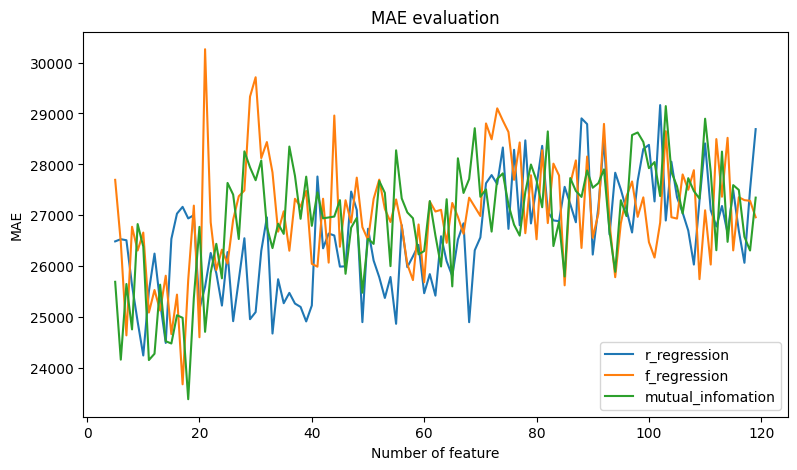

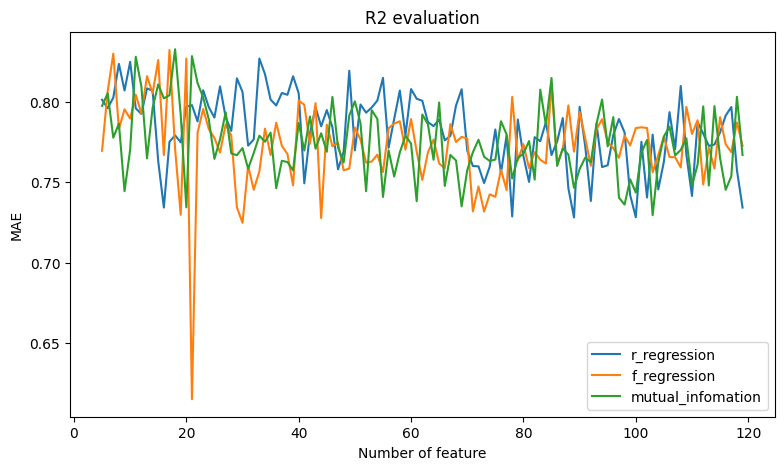

In [43]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(joint["K"],joint["MAE_x"],label="r_regression")
plt.plot(joint["K"],joint["MAE_y"],label="f_regression")
plt.plot(joint["K"],joint["MAE"],label="mutual_infomation")
plt.xlabel("Number of feature")
plt.ylabel("MAE")
plt.title("MAE evaluation") 
plt.legend()
plt.figure(figsize=(20,5))
plt.subplot(1,2,2)
plt.plot(joint["K"],joint["r2_x"],label="r_regression")
plt.plot(joint["K"],joint["r2_y"],label="f_regression")
plt.plot(joint["K"],joint["r2"],label="mutual_infomation")
plt.xlabel("Number of feature")
plt.ylabel("MAE")
plt.title("R2 evaluation") 
plt.legend()